<a href="https://colab.research.google.com/github/kishan1104/Calculator/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.svm import SVR


In [ ]:
sns.set(rc={'figure.figsize':(15.7,13.27)},style="ticks", color_codes=True)
df = pd.read_csv("/content/drive/MyDrive/Datasets/Car_Prices.csv")
print(df.shape)
print(df.dtypes)


#The features which are dropped here have a very low corelation with the price.
df.drop(['CarName','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem'], axis = 1, inplace = True)





(205, 26)
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [ ]:

#The below code is used to get the number of different categorical values a column contains.


# arr = []

# for i in df['fuelsystem']:
#   if i in arr:
#     continue
#   else:
#     arr.append(i)

# print(arr)



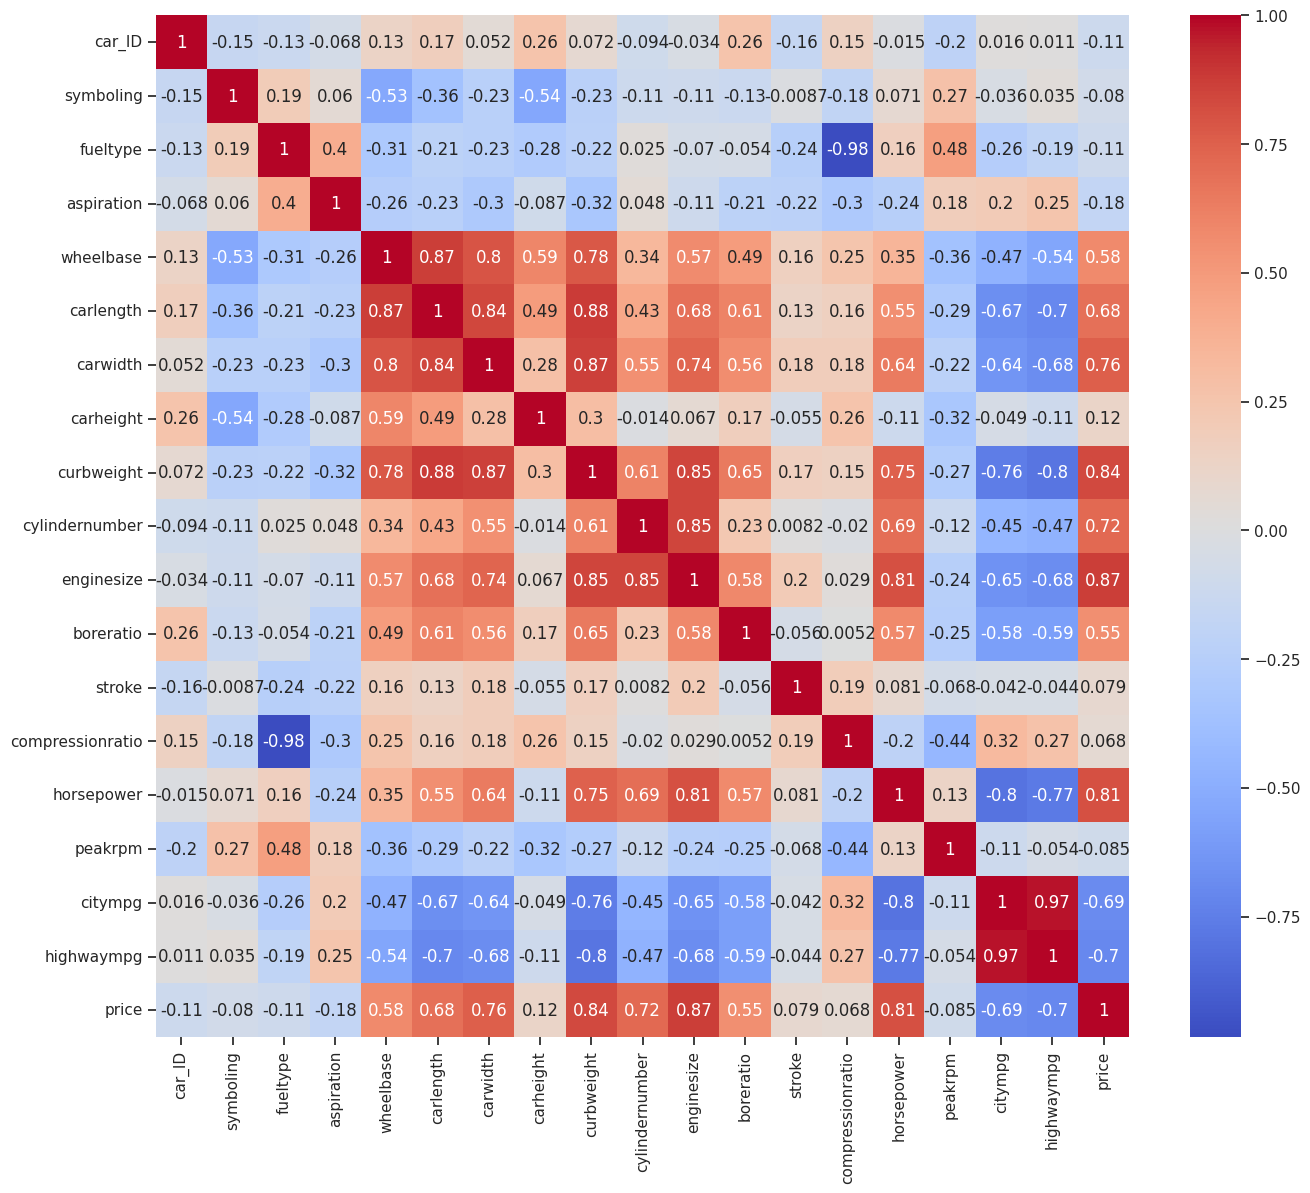

In [ ]:

# to find if the dataset contains any null values
#The dataset dosent contain any null values
df.isnull().sum()


# Function used to encode categorical values to numeric values
def cyl(x):
  if x =='four':
    return 4
  elif x == 'five':
    return 5
  elif x == 'six':
    return 6
  elif x=='three':
    return 3
  elif x=='twelve':
    return 12
  elif x=='two':
    return 2
  else:
    return 8


#encoding categorical values to numeric values

# Here you can only see 3 values which are just for example purpose on how to encode the values

# after encoding I check the correlation matrix heatmap to understand how one value effects the target variable


df['fueltype'] = df['fueltype'].apply(
    lambda x: 1 if x == 'gas' else (0 if x == 'diesel' else None))


df['aspiration'] = df['aspiration'].apply(
    lambda x: 1 if x == 'std' else (0 if x == 'turbo' else None))

df['cylindernumber'] = df['cylindernumber'].apply(cyl)





sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

corr_matrix = df.corr()

# Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]



In [ ]:
# I dropped all the columns which dosen't impact much on the price our target variable

df.drop(['car_ID','symboling','aspiration','carheight','stroke','compressionratio','peakrpm','citympg'],axis=1,inplace=True)

# After feature Extarction we are left with these attributes.

df.head()

,fueltype,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price
0,1,88.6,168.8,64.1,2548,4,130,3.47,111,27,13495.0
1,1,88.6,168.8,64.1,2548,4,130,3.47,111,27,16500.0
2,1,94.5,171.2,65.5,2823,6,152,2.68,154,26,16500.0
3,1,99.8,176.6,66.2,2337,4,109,3.19,102,30,13950.0
4,1,99.4,176.6,66.4,2824,5,136,3.19,115,22,17450.0


In [ ]:
#Splitting data set into training and testing
X = df.drop('price', axis=1)
y = df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
          fueltype   wheelbase   carlength    carwidth   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean     0.902439   98.756585  174.049268   65.907805  2555.565854   
std      0.297446    6.021776   12.337289    2.145204   520.680204   
min      0.000000   86.600000  141.100000   60.300000  1488.000000   
25%      1.000000   94.500000  166.300000   64.100000  2145.000000   
50%      1.000000   97.000000  173.200000   65.500000  2414.000000   
75%      1.000000  102.400000  183.100000   66.900000  2935.000000   
max      1.000000  120.900000  208.100000   72.300000  4066.000000   

       cylindernumber  enginesize   boreratio  horsepower  highwaympg  \
count      205.000000  205.000000  205.000000  205.000000  205.000000   
mean         4.380488  126.907317    3.329756  104.117073   30.751220   
std          1.080854   41.642693    0.270844   39.544167    6.886443   
min          2.000000   61.000000    2.540000   48.00000

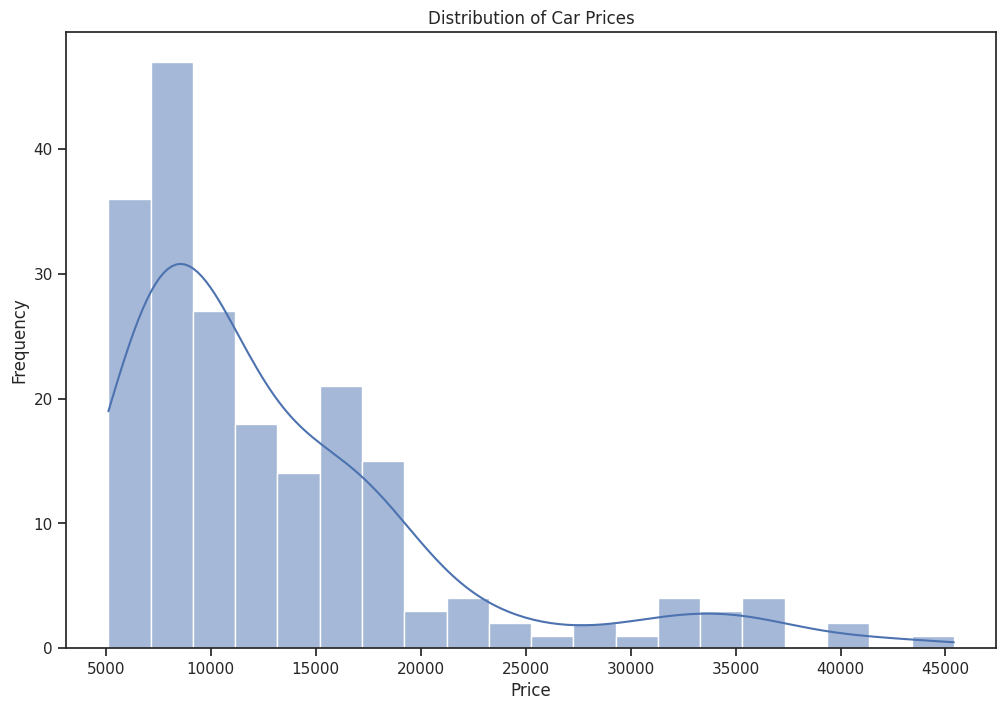

In [ ]:
# Bar graph which shows how prices of the car varies with frequency.
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Model Building
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Train Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train SVM model
sv_model = SVR(kernel = 'rbf')
sv_model.fit(X_train_scaled, y_train)


SVR()

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Model:")
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R²):", r2_lr)
# print("coeffecients:",lr_model.coef_)

# Make predictions and evaluate Decision Tree Regression model
y_pred_dt = dt_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regression Model:")
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R²):", r2_dt)

# Make predictions and evaluate Random Forest Regression model
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regression Model:")
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R²):", r2_rf)

# Make predictions and evaluate SVM model
y_pred_sv = sv_model.predict(X_test)
mse_sv = mean_squared_error(y_test, y_pred_sv)
rmse_sv = np.sqrt(mse_sv)
r2_sv = r2_score(y_test, y_pred_sv)
print("\nSVM Model:")
print("Root Mean Squared Error (RMSE):", rmse_sv)
print("R-squared (R²):", r2_sv)

Linear Regression Model:
Root Mean Squared Error (RMSE): 3771.32015092666
R-squared (R²): 0.8198361887030454

Decision Tree Regression Model:
Root Mean Squared Error (RMSE): 2987.5320805151277
R-squared (R²): 0.8869407989021378

Random Forest Regression Model:
Root Mean Squared Error (RMSE): 1875.3570269477011
R-squared (R²): 0.9554499005835618

SVM Model:
Root Mean Squared Error (RMSE): 9326.083724966385
R-squared (R²): -0.10174065972227231


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
